# Unet Preprocessing Visulization

In this notebook, we implemented Unet Preprocessing, which means slicing each image into 128*128 subimages.
<br> We also visualized those images.
<br> Reference https://github.com/jocicmarko/ultrasound-nerve-segmentation


In [1]:
%matplotlib inline

import numpy as np
import cv2
import glob
from scipy.misc import imread
import sys
import urllib
from math import ceil

Using TensorFlow backend.


## Define functions to load data and slice image

In [2]:
def load_train():
    """This function takes in .npy file which is generated in preprocessing.py by Raun
    The size of original np array is (221,100,image_size_x,image_size_y)
    It flatten the array into size (22100,image_size_x,image_size,y)"""
    file_num = len(glob.glob("X_train*.npy"))
    train_set = []
    for num in range(file_num):
        x_file_name = "X_train_" + str(num) + ".npy"
        x = np.load(x_file_name)
        for array in x:
            train_set.append(array)
    return train_set

In [3]:
def load_mask():
    """This function takes in .npy file which is generated in preprocessing.py by Raun
    The size of original np array is (221,100,mask_size_x,mask_size_y)
    It flatten the array into size (22100,mask_size_x,mask_size,y)"""
    file_num = len(glob.glob("y*.npy"))
    mask_set = list()
    for num in range(file_num):
        y_file_name = "y_train_" + str(num) + ".npy"
        y = np.load(y_file_name)
        for array in y:
            mask_set.append(array)
    return mask_set

In [4]:
def slice_image(image,mask):
    """This function takes in a pair of image and mask with size (image_size_x,image_size_y)
    It slices the input image/mask into small subimages with size (128*128)
    if the image size is not divisible by 128, the last row/col of images overlap with the images from previous row/col"""
    new_images = []
    new_masks = []
    if image.shape != mask.shape:
        print("image and mask sizes do not match")
        return
    else:
        shape = image.shape
        x = ceil(shape[0]/128.)
        y = ceil(shape[1]/128.)
        for i in range(x):
            for j in range(y):
                if i == x-1:
                    image_x = image[shape[0]-128:,:]
                    mask_x = mask[shape[0]-128:,:]
                else:
                    image_x = image[(i)*128:(i+1)*128,:]
                    mask_x = mask[(i)*128:(i+1)*128,:]
                if j == y-1:
                    new_image = image_x[:,shape[1]-128:]
                    new_mask = mask_x[:,shape[1]-128:]
                else:
                    new_image = image_x[:,(j)*128:(j+1)*128]
                    new_mask = mask_x[:,(j)*128:(j+1)*128]
                    
                new_images.append(new_image)
                new_masks.append(new_mask)
        return new_images,new_masks

In [24]:
def preprocess( train_set,mask_set):
    """This function create set of sliced images and masks"""
    subimage_set = []
    submask_set = []
    size = len(train_set)
    for i in range(size):
        if i % 5000 == 0:
            print("finished slicing ", i, "images")
        image = train_set[i]
        mask = mask_set[i]
        images,masks = slice_image(image,mask)
        for i in images:
            subimage_set.append(i)
        for m in masks:
            submask_set.append(m)
        
    return np.array(subimage_set),np.array(submask_set)

## Preprocess and Visualization

In [26]:
train_set = load_train()
mask_set = load_mask()
x_train, y_train = preprocess(train_set,mask_set)

finished slicing  0 images
finished slicing  5000 images
finished slicing  10000 images
finished slicing  15000 images
finished slicing  20000 images


The different sizes of images are shown in the following cell:

In [7]:
shapes = []
for x in train_set:
    shapes.append(x.shape)
set(shapes)

{(128, 128),
 (128, 256),
 (128, 512),
 (240, 320),
 (256, 256),
 (256, 512),
 (256, 640),
 (384, 256),
 (384, 384),
 (384, 512),
 (480, 640),
 (512, 256),
 (512, 512)}

In [8]:
x_train.shape

(267000, 128, 128)

### Visualize one image and mask with their sliced subplots

In [9]:
image, mask = train_set[1000],mask_set[1000]
image_sliced, mask_sliced = slice_image(train_set[1000],mask_set[1000])

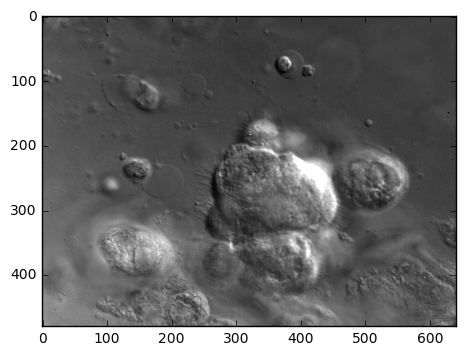

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(image,"gray")

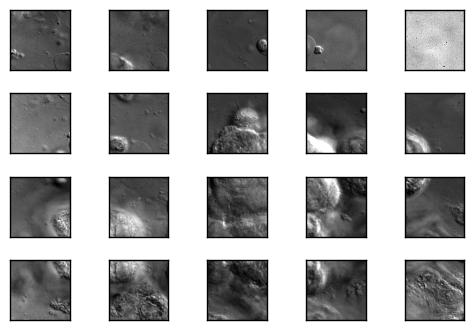

In [11]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(image_sliced)+1):
    ax = fig.add_subplot(4, 5, i)
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(image_sliced[i-1],"gray")


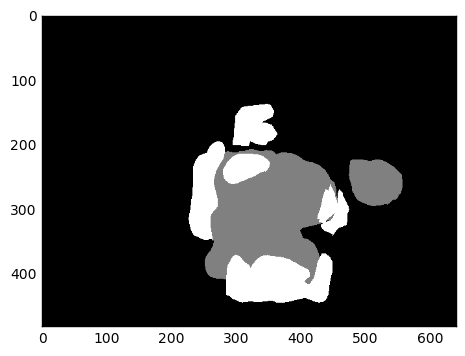

In [12]:
import matplotlib.pyplot as plt 
plt.imshow(mask,"gray")


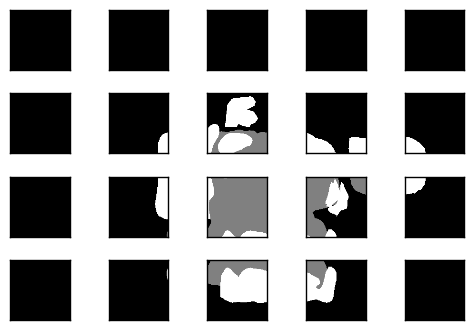

In [13]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(mask_sliced)+1):
    ax = fig.add_subplot(4, 5, i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(mask_sliced[i-1],"gray")

In [8]:
np.save("x_train.npy",x_train)

In [9]:
np.save("y_train.npy",y_train)

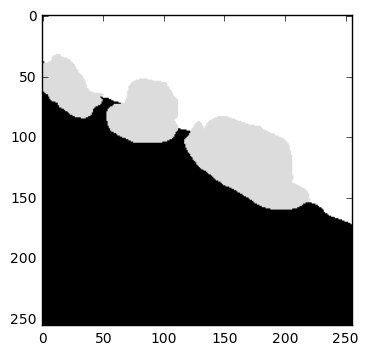

In [17]:
import matplotlib.pyplot as plt 

plt.imshow(mask_set[0]*225,"gray")

In [18]:
image_sliced, mask_sliced = slice_image(train_set[0],mask_set[0])

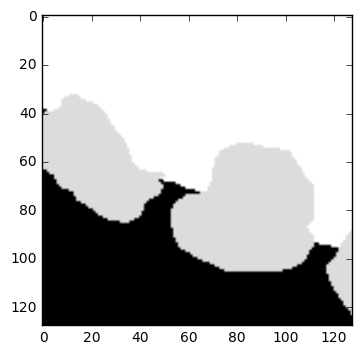

In [23]:
plt.imshow(mask_sliced[0]*225,"gray")

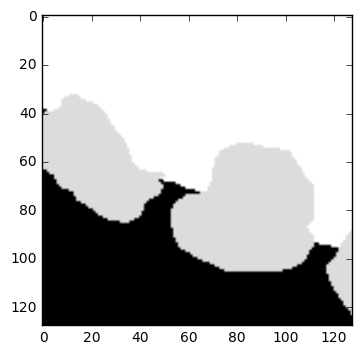

In [29]:
plt.imshow(y_train[0]*225,"gray")